In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [2]:
data = pd.read_csv('/Users/mohdaffan/Desktop/AmazonSalesData.csv')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


# Show first few rows

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Check exact column names

In [7]:

print(data.columns.tolist())


['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']


# Create a SQLite database in memory (or on disk)

In [10]:
conn = sqlite3.connect(":memory:")  # Creates a temporary DB in RAM


In [11]:
data.to_sql("sales", conn, index=False, if_exists="replace")


100

In [12]:
conn = sqlite3.connect('/Users/mohdaffan/Desktop/Sales Dataset.csv')


In [13]:
conn

           product  total_qty      revenue
0        Cosmetics      83718  36601509.60
1  Office Supplies      46967  30585380.07
2        Household      44727  29889712.29
3        Baby Food      40545  10350327.60
4          Clothes      71260   7787292.80


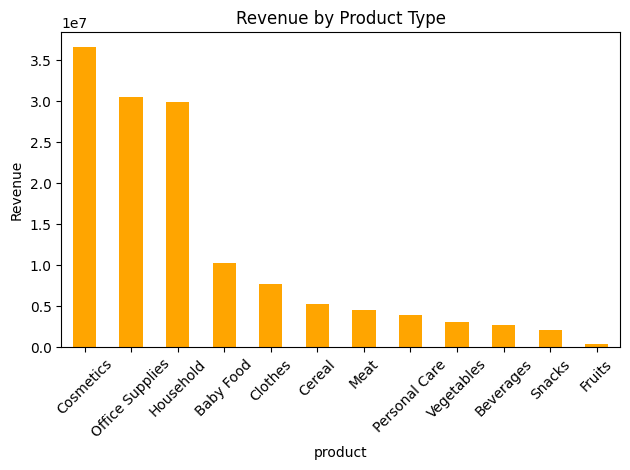

In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv('/Users/mohdaffan/Desktop/AmazonSalesData.csv')

# Create in-memory SQLite DB
conn = sqlite3.connect(":memory:")

# Load DataFrame into SQL
data.to_sql("sales", conn, index=False, if_exists="replace")

# SQL query
query = """
SELECT 
    `Item Type` AS product,
    SUM(`Units Sold`) AS total_qty,
    SUM(`Units Sold` * `Unit Price`) AS revenue
FROM sales
GROUP BY `Item Type`
ORDER BY revenue DESC
"""

# Execute query
df_result = pd.read_sql_query(query, conn)
print(df_result.head())

# Plot
df_result.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product Type")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


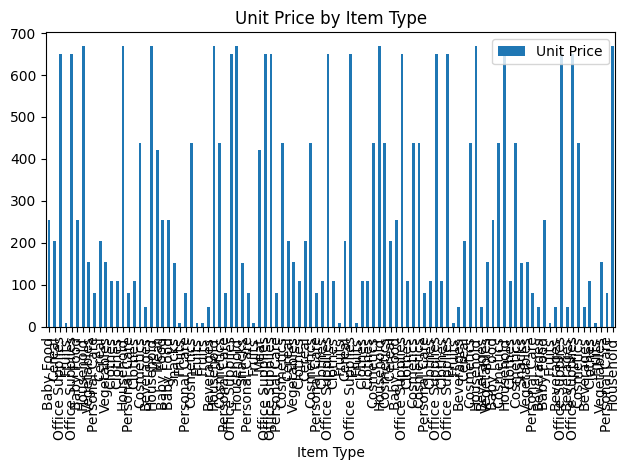

In [34]:
data.plot(kind='bar', x='Item Type', y='Unit Price')

# Customize and save the plot
plt.title("Unit Price by Item Type")
plt.tight_layout()
plt.show()

In [48]:
top_items =data.head()
top_items

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
